In [102]:
import numpy as np

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [104]:
books=pd.read_csv(r"C:/Users/Farah/Desktop/Python_project/books.csv",on_bad_lines="skip")

In [105]:
books
#ignore the bad line because only 5 rows

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books
11121,45639,Poor People,William T. Vollmann,3.72,0060878827,9780060878825,eng,434,769,139,2/27/2007,Ecco


In [106]:
number_duplicates=books.duplicated().sum()
print(f"Number of duplicated rows in 'books': {number_duplicates}")

Number of duplicated rows in 'books': 0


In [107]:
books=books.drop(columns=['isbn','isbn13'])

In [108]:
#isbn and isbn13 are not important for our study as they are just another book's id 

In [109]:

column_type = books['publication_date'].dtype

# Print or display the result
print(f"The data type of 'publication_date' column is: {column_type}")


The data type of 'publication_date' column is: object


In [110]:
#print("Unique values in 'publication_date' column:")
#books['publication_date'].unique().shape

In [111]:

# Convert 'publication_date' to datetime data type with the adjusted format
books['publication_date'] = pd.to_datetime(books['publication_date'], format='%m/%d/%Y', errors='coerce')

# Check for rows with NaT values (invalid dates)
invalid_dates = books[books['publication_date'].isna()]

# Display or print rows with invalid dates
print("Rows with invalid dates:")
invalid_dates.shape



Rows with invalid dates:


(2, 10)

In [112]:
# Drop rows with invalid dates as they are just 2 rows
books = books.dropna(subset=['publication_date'])


In [113]:
##

In [114]:
# Transform the date format to 'day/month/year'
books.loc[:, 'publication_date'] = books['publication_date'].dt.strftime('%d/%m/%Y')

# Check the result
print(books['publication_date'])


0       2006-09-16
1       2004-01-09
2       2003-01-11
3       2004-01-05
4       2004-09-13
           ...    
11118   2004-12-21
11119   1988-01-12
11120   1993-01-08
11121   2007-02-27
11122   2006-05-28
Name: publication_date, Length: 11121, dtype: datetime64[ns]


In [115]:
books.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [116]:
#there is no missing values

In [117]:
books.nunique()

bookID                11121
title                 10346
authors                6638
average_rating          209
language_code            27
  num_pages             997
ratings_count          5293
text_reviews_count     1822
publication_date       3677
publisher              2289
dtype: int64

In [118]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'language_code',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [119]:
#as we see columns are correctly written except num_pages which we will correct below

In [120]:
books=books.rename(columns={'  num_pages':'num_pages'})

In [121]:
books.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'language_code',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher'],
      dtype='object')

In [122]:
books.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
count,11121.000000,11121.000000,11121.000000,1.112100e+04,11121.000000,11121
mean,21307.774301,3.934058,336.343944,1.794512e+04,542.118874,2000-07-10 11:24:27.386026496
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1900-01-01 00:00:00
25%,10270.000000,3.770000,192.000000,1.040000e+02,9.000000,1998-04-06 00:00:00
50%,20264.000000,3.960000,299.000000,7.450000e+02,47.000000,2003-01-07 00:00:00
75%,32104.000000,4.140000,416.000000,4.996000e+03,238.000000,2005-08-11 00:00:00
max,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00
std,13093.542472,0.350513,241.129968,1.125091e+05,2576.845134,NaN


In [123]:
#we have to get rid of the rows with 0 average_rating and also the ones with 0 ratings_count 

In [124]:
books.query("ratings_count==0").shape

(80, 10)

In [125]:
books.query("average_rating==0").shape

(25, 10)

In [126]:
books.query('(average_rating > 0) & (ratings_count == 0)').shape

(55, 10)

In [127]:
##so we see there's a bias here so we will eliminate all the books with ratings_count=0
#it's the books that nobody rated so they cannot have a rating and shall be excluded
#below we will just confirm that all books have ratings_count>text_review_count

In [128]:
books.query('ratings_count<text_reviews_count')

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
7209,27647,Secretos De Familia,Julia Glass,3.57,spa,528,0,1,2006-01-11,Puzzle-Roca
10138,41044,Day and Night,Better Homes and Gardens,0.00,eng,32,0,1,1989-01-03,Meredith Corporation


In [129]:
#as we see normally all the books have a ratings_count bigger than text_reviews_count which is logical
#those 2 will be eliminated as they have rating_count zero

In [130]:
books.query('(ratings_count<5)').shape

(380, 10)

In [131]:
#Also we consider in our project that books with less than 5 ratings are not useful.

In [132]:
books=books.query('ratings_count>4')
books.shape

(10741, 10)

In [133]:
books.query("num_pages>1500").shape

(29, 10)

In [134]:
#as we see the majority of books have less than 1500 pages

In [135]:
b1500=books.query("num_pages>1500")
b1500['average_rating'].mean()

4.405862068965518

In [136]:
b10=books.query("num_pages<10")
b10['average_rating'].mean()

3.9749132947976875

In [137]:
b10.shape

(173, 10)

In [138]:
df=books.query("10<num_pages<=1500")

In [139]:
df.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
count,10526.000000,10526.000000,10526.000000,1.052600e+04,10526.000000,10526
mean,21234.978624,3.943509,339.960479,1.891432e+04,571.610393,2000-07-14 02:34:02.485274624
min,1.000000,2.400000,11.000000,5.000000e+00,0.000000,1900-01-01 00:00:00
25%,10203.250000,3.780000,205.000000,1.460000e+02,11.000000,1998-03-17 06:00:00
50%,20020.000000,3.960000,304.000000,8.885000e+02,54.000000,2003-01-06 00:00:00
75%,32063.750000,4.130000,417.000000,5.580250e+03,260.750000,2005-08-11 00:00:00
max,45641.000000,5.000000,1500.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00
std,13096.966500,0.279024,209.284340,1.155589e+05,2645.485731,NaN


In [140]:
#now we have no 0 which is good
#we can have books with 0 text_review_count but have enough ratings_count to be considered important for our project

In [141]:
df.query('average_rating>=4').shape

(4675, 10)

In [142]:
df.query('3<=average_rating<4').shape

(5818, 10)

In [143]:
df.query('average_rating<3').shape

(33, 10)

In [144]:
#we have a few books who have less than 3 in average rating 
#so we will treat them as bad books with the same category of books less than 4

In [145]:
#we will add another column 'rating' which takes 0 (if average_rating<4) or 1(otherwise) values
df.loc[:,'rating'] = df.loc[:,'average_rating'].apply(lambda x: 0 if x < 4 else 1)
#df['rating'] = df['average_rating'].apply(lambda x: 0 if x < 4 else 1)


C:\Users\Farah\AppData\Local\Temp\ipykernel_11880\2897974733.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



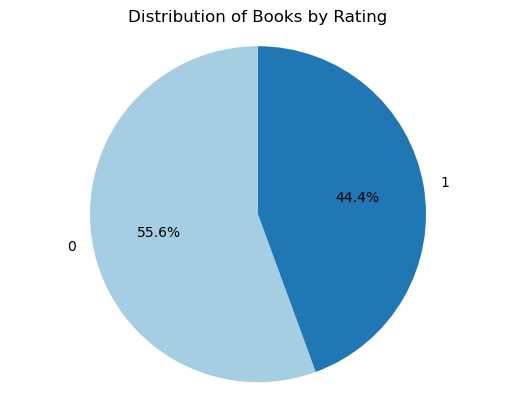

In [146]:


# Calculate the sum of books for each rating value
rating_counts = df['rating'].value_counts()

# Plot a pie chart
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Set aspect ratio to be equal to ensure the pie is circular
plt.axis('equal')

# Add a title
plt.title('Distribution of Books by Rating')

# Show the plot
plt.show()


In [147]:
rating_counts

rating
0    5851
1    4675
Name: count, dtype: int64

In [148]:
df.head(10)

,bookID,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,1
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-01-09,Scholastic Inc.,1
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-01-11,Scholastic,1
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-01-05,Scholastic Inc.,1
5,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.74,en-US,152,19,1,2005-04-26,Nimble Books,0
7,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,eng,815,3628,254,2005-01-11,Gramercy Books,1
8,13,The Ultimate Hitchhiker's Guide to the Galaxy ...,Douglas Adams,4.38,eng,815,249558,4080,2002-04-30,Del Rey Books,1
9,14,The Hitchhiker's Guide to the Galaxy (Hitchhik...,Douglas Adams,4.22,eng,215,4930,460,2004-03-08,Crown,1
11,18,The Ultimate Hitchhiker's Guide (Hitchhiker's ...,Douglas Adams,4.38,eng,815,2877,195,1996-01-17,Wings Books,1
12,21,A Short History of Nearly Everything,Bill Bryson,4.21,eng,544,248558,9396,2004-09-14,Broadway Books,1


In [149]:
fig = px.histogram(df, x="ratings_count")
fig.show()

In [150]:
#we will add log_y=True to have a better visualization of our histogram
fig = px.histogram(df, x="ratings_count",log_y=True)
fig.show()

In [151]:
df.query("ratings_count>1000000").shape

(30, 11)

In [152]:
df1M=df.query("ratings_count>1000000")
df1M['average_rating'].mean()

4.054333333333334

In [153]:
df1M['average_rating'].std()

0.2739076528665284

In [154]:
#The standard deviation is a measure of the amount of variation or dispersion in a set of values. 
#A low standard deviation indicates that the values are close to the mean

In [155]:
df.query("ratings_count>500000").shape


(69, 11)

In [156]:
df05M=df.query("ratings_count>500000")
df05M['average_rating'].mean()

4.048260869565217

In [157]:
df05M['average_rating'].std()

0.2423533912294384

In [158]:
#so we can limit our study on books with ratings_count less than 0.5M

In [159]:
df2=df.query("ratings_count<=500000")

In [160]:
df2.shape

(10457, 11)

In [161]:
fig2 = px.scatter(df2, x="ratings_count", y="average_rating")
fig2.show()

In [162]:
#we can say that as soon as we approach 70000 of ratings count tha average rating is between 3.5 and 4.5

In [163]:
fig3 = px.scatter(df2, x="text_reviews_count", y="average_rating")
fig3.show()

In [164]:
#we can say the same for text_reviews_count that after 4000 text_reviews_count the average rating is btw 3.5 qnd 4.5

In [165]:
fig = px.histogram(df2, x="num_pages")
fig.show()

In [166]:
num_books_have_same_num_pages=df2.groupby('num_pages').size().reset_index(name='number_of_books').sort_values('number_of_books', ascending=False)
num_books_have_same_num_pages

,num_pages,number_of_books
267,288,224
171,192,214
299,320,214
331,352,201
235,256,201
...,...,...
809,915,1
675,717,1
614,642,1
16,29,1


In [167]:
one_book_num_pages=num_books_have_same_num_pages.query('number_of_books==1')
one_book_num_pages.shape

(214, 2)

In [168]:

one_book_num_pages_=df2[df2['num_pages'].isin(one_book_num_pages['num_pages'])]
one_book_num_pages_merged=one_book_num_pages_.merge(one_book_num_pages[['num_pages', 'number_of_books']], on='num_pages')
one_book_num_pages_merged.groupby('num_pages').agg({'average_rating': 'mean', 'ratings_count': 'sum','number_of_books' : 'first'}).reset_index().sort_values(by=['average_rating'])

,num_pages,average_rating,ratings_count,number_of_books
26,571,3.09,1601,1
32,615,3.22,9,1
61,741,3.36,36,1
58,738,3.42,20888,1
134,998,3.47,34,1
...,...,...,...,...
188,1278,4.55,425,1
107,888,4.57,48,1
120,915,4.61,23,1
64,746,4.61,925,1


In [169]:
multiple_book_num_pages=num_books_have_same_num_pages.query('number_of_books>1')
multiple_book_num_pages.shape

(739, 2)

In [170]:

multiple_book_num_pages_=df2[df2['num_pages'].isin(multiple_book_num_pages['num_pages'])]
multiple_book_num_pages_merged=multiple_book_num_pages_.merge(multiple_book_num_pages[['num_pages', 'number_of_books']], on='num_pages')
multiple_book_num_pages_merged.groupby('num_pages').agg({'average_rating': 'mean', 'ratings_count': 'sum','number_of_books' : 'first'}).reset_index().sort_values(by=['average_rating'])

,num_pages,average_rating,ratings_count,number_of_books
435,477,3.445000,2323,2
136,177,3.516667,1347,3
562,625,3.550000,19231,3
264,305,3.604000,10904,5
49,86,3.615000,690,2
...,...,...,...,...
615,712,4.440000,1934,2
686,898,4.445000,1434,2
726,1216,4.515000,2484,2
715,1103,4.550000,567,2


In [171]:
df2.loc[:,'year'] = df2.loc[:,'publication_date'].dt.year

C:\Users\Farah\AppData\Local\Temp\ipykernel_11880\3392881653.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [172]:
num_books_by_year=df2.groupby('year').size().reset_index(name='number_of_books').sort_values('number_of_books', ascending=False)
num_books_by_year

,year,number_of_books
70,2006,1593
69,2005,1169
68,2004,993
67,2003,858
66,2002,750
...,...,...
7,1928,1
5,1923,1
3,1919,1
2,1914,1


In [173]:
num_books_by_year.nunique()

year               85
number_of_books    50
dtype: int64

In [174]:
num_books_by_year.query('number_of_books>1').shape
#years with more than 1 book published

(72, 2)

In [175]:
multiple_num_books_by_year=num_books_by_year.query('number_of_books>1')
multiple_num_books_by_year_=df2[df2['year'].isin(multiple_num_books_by_year['year'])]
multiple_num_books_by_year_merged = multiple_num_books_by_year_.merge(multiple_num_books_by_year[['year','number_of_books']], on ='year')

multiple_num_books_by_year_merged.groupby('year').agg({'average_rating': 'mean', 'ratings_count': 'sum','number_of_books' : 'first'}).reset_index().sort_values(by=['average_rating'])

,year,average_rating,ratings_count,number_of_books
2,1949,3.680000,1230,2
16,1964,3.836250,21468,16
24,1972,3.846154,21406,13
17,1965,3.877500,5645,8
63,2011,3.886190,107161,21
...,...,...,...,...
18,1966,4.073333,8252,3
13,1961,4.078000,6085,5
65,2013,4.089231,24603,13
0,1921,4.140000,59,2


In [176]:
df2.loc[:,'month'] = df2.loc[:,'publication_date'].dt.month

C:\Users\Farah\AppData\Local\Temp\ipykernel_11880\2317725331.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
num_books_by_month=df2.groupby('month').size().reset_index(name='number_of_books').sort_values('number_of_books', ascending=False)
num_books_by_month

,month,number_of_books
0,1,3606
9,10,721
8,9,686
4,5,685
2,3,670
3,4,660
5,6,636
7,8,589
11,12,586
1,2,581


In [178]:
num_books_by_month_=df2[df2['month'].isin(num_books_by_month['month'])]
num_books_by_month_merged= num_books_by_month_.merge(num_books_by_month[['month','number_of_books']], on ='month')

num_books_by_month_merged.groupby('month').agg({'average_rating': 'mean', 'ratings_count': 'sum','number_of_books' : 'first'}).reset_index().sort_values(by=['average_rating'])

,month,average_rating,ratings_count,number_of_books
6,7,3.924257,5914334,545
3,4,3.925439,8622399,660
1,2,3.933133,7899999,581
7,8,3.934737,8736207,589
4,5,3.936204,9227041,685
11,12,3.938532,6453854,586
0,1,3.940008,35990309,3606
2,3,3.940284,7510102,670
5,6,3.951509,7693602,636
10,11,3.957764,5200695,492


In [179]:
num_books_by_author=df2.groupby('authors').size().reset_index(name='number_of_books').sort_values('number_of_books', ascending=False)
num_books_by_author

,authors,number_of_books
4451,P.G. Wodehouse,40
5138,Rumiko Takahashi,38
5435,Stephen King,37
4417,Orson Scott Card,34
45,Agatha Christie,31
...,...,...
2884,Johann Wolfgang von Goethe/R. Paulin,1
2883,Johann Wolfgang von Goethe/Philip Wayne,1
2882,Johann Wolfgang von Goethe/Peter Salm,1
2881,Johann Wolfgang von Goethe/Peter Hutchinson/El...,1


In [180]:
multiple_num_books_by_author=num_books_by_author.query('number_of_books>1')
multiple_num_books_by_author

,authors,number_of_books
4451,P.G. Wodehouse,40
5138,Rumiko Takahashi,38
5435,Stephen King,37
4417,Orson Scott Card,34
45,Agatha Christie,31
...,...,...
69,Alan Lightman,2
141,Alexandre Dumas/Robin Buss,2
1176,David Gemmell,2
1018,D.T. Max,2


In [181]:
multiple_num_books_by_author_=df2[df2['authors'].isin(multiple_num_books_by_author['authors'])]
multiple_num_books_by_author_merged= multiple_num_books_by_author_.merge(multiple_num_books_by_author[['authors','number_of_books']], on ='authors')

multiple_num_books_by_author_merged.groupby('authors').agg({'average_rating': 'mean', 'ratings_count': 'sum', 'number_of_books':'first'}).reset_index().sort_values('average_rating')

,authors,average_rating,ratings_count,number_of_books
942,Penny Jordan,2.920000,65,2
863,Monica Ali,3.065000,24636,2
336,Emma McLaughlin/Nicola Kraus,3.080000,5486,3
1238,Walter Kirn,3.150000,4707,2
1021,Robb Forman Dew,3.160000,438,2
...,...,...,...,...
282,Don Rosa,4.575000,3426,2
201,Cook's Illustrated Magazine,4.596667,78,3
444,Hayao Miyazaki/Matt Thorn/Kaori Inoue/Joe Yama...,4.613333,5396,3
1005,Richard P. Feynman/Robert B. Leighton/Matthew ...,4.625000,733,2


In [182]:
#

In [183]:
num_books_by_publisher=df2.groupby('publisher').size().reset_index(name='number_of_books').sort_values('number_of_books')
num_books_by_publisher

,publisher,number_of_books
1055,Lions,1
852,Harrison House,1
1560,Regan Books,1
850,Harpercollins Childrens Books,1
849,Harpercollins Children's Books,1
...,...,...
173,Ballantine Books,141
1131,Mariner Books,145
1385,Penguin Classics,179
1368,Penguin Books,252


In [184]:
num_books_by_publisher.query("number_of_books<2").shape

(1174, 2)

In [185]:
publisher_with_one_book=num_books_by_publisher.query("number_of_books<2")
publisher_with_one_book_=df2[df2['publisher'].isin(publisher_with_one_book['publisher'])]
publisher_with_one_book_merged=publisher_with_one_book_.merge(publisher_with_one_book[['publisher', 'number_of_books']], on='publisher')
publisher_with_one_book_merged.groupby('publisher').agg({'average_rating': 'mean', 'ratings_count': 'sum','number_of_books' : 'first'}).reset_index().sort_values('average_rating')

,publisher,average_rating,ratings_count,number_of_books
579,Libraries Unlimited,2.67,9,1
444,Harlequin Romance,2.83,23,1
886,Revive Publishing,2.86,114,1
268,Deodand Publishing,2.86,2276,1
1107,Voice,2.93,195,1
...,...,...,...,...
967,Skinner House Books,4.75,8,1
1067,Universe Publishing(NY),4.83,6,1
1013,Teacher's Pet Publications,4.86,5,1
1129,Welcome Books,4.88,8,1


In [186]:
#we have a very important number of publishers who published only one book, more than half of publishers

In [187]:
publisher_with_multiple_books=num_books_by_publisher.query("number_of_books>1")
publisher_with_multiple_books.shape

(937, 2)

In [188]:

publisher_with_multiple_books_=df2[df2['publisher'].isin(publisher_with_multiple_books['publisher'])]
publisher_with_multiple_books_merged=publisher_with_multiple_books_.merge(publisher_with_multiple_books[['publisher', 'number_of_books']], on='publisher')
publisher_with_multiple_books_merged.groupby('publisher').agg({'average_rating': 'mean', 'ratings_count': 'sum','number_of_books' : 'first'}).reset_index().sort_values('average_rating')


,publisher,average_rating,ratings_count,number_of_books
58,Authorhouse,3.025000,83,2
7,Ace Trade,3.305000,169,2
876,Virgin Publishing,3.316667,1398,3
357,Harlequin Presents,3.317500,456,4
626,Plexus Publishing,3.330000,536,2
...,...,...,...,...
675,Recorded Books Inc.,4.515000,3680,2
932,東立,4.546667,35,6
930,ガンガンコミックス,4.548000,140,5
109,Black Classic Press,4.560000,402,3


In [189]:
publisher_with_multiple_books_merged_=publisher_with_multiple_books_merged.groupby('publisher').agg({'average_rating': 'mean', 'ratings_count': 'sum','number_of_books' : 'first'}).reset_index().sort_values('average_rating')

In [190]:
publisher_with_multiple_books_merged_.query('average_rating>3.5').shape

(924, 4)

In [191]:
publisher_with_multiple_books_merged_.query('average_rating<4.501').shape

(932, 4)

In [192]:
#again we can say that the publisher who published more than 1 book have an average rating between 3.5 and 4.5

In [193]:
#df2.publisher.value_counts()

In [194]:
#

In [195]:
df2.groupby('publisher').agg({'average_rating': 'mean', 'ratings_count': 'sum'}).reset_index().sort_values('average_rating')

,publisher,average_rating,ratings_count
1046,Libraries Unlimited,2.67,9
802,Harlequin Romance,2.83,23
1566,Revive Publishing,2.86,114
500,Deodand Publishing,2.86,2276
1986,Voice,2.93,195
...,...,...,...
1710,Skinner House Books,4.75,8
1898,Universe Publishing(NY),4.83,6
1799,Teacher's Pet Publications,4.86,5
2028,Welcome Books,4.88,8


In [196]:
average_rating_by_publisher = df.groupby('publisher')['average_rating'].mean().reset_index().sort_values('average_rating')
average_rating_by_publisher['publisher_id'] = pd.factorize(average_rating_by_publisher['publisher'])[0]+1
average_rating_by_publisher.insert(0, 'publisher_id', average_rating_by_publisher.pop('publisher_id'))
print(average_rating_by_publisher)

      publisher_id                   publisher  average_rating
1049             1         Libraries Unlimited            2.67
804              2           Harlequin Romance            2.83
1572             3           Revive Publishing            2.86
502              4          Deodand Publishing            2.86
1992             5                       Voice            2.93
...            ...                         ...             ...
1716          2113         Skinner House Books            4.75
1904          2114     Universe Publishing(NY)            4.83
1805          2115  Teacher's Pet Publications            4.86
2034          2116               Welcome Books            4.88
1744          2117       Square One Publishers            5.00

[2117 rows x 3 columns]


In [197]:
###


In [198]:
number_books_same_language=df2.groupby('language_code').size().reset_index(name='number_of_books').sort_values('number_of_books')
number_books_same_language.query('number_of_books<5').shape

(12, 2)

In [199]:
number_books_same_language

,language_code,number_of_books
0,ale,1
1,ara,1
22,swe,1
18,nor,1
17,nl,1
15,msa,1
9,gla,1
10,glg,1
23,tur,1
20,rus,2


In [200]:
language_of_less_5_books=number_books_same_language.query('number_of_books<5')
language_of_less_5_books

,language_code,number_of_books
0,ale,1
1,ara,1
22,swe,1
18,nor,1
17,nl,1
15,msa,1
9,gla,1
10,glg,1
23,tur,1
20,rus,2


In [201]:
language_of_less_5_books_ = df2[df2['language_code'].isin(language_of_less_5_books['language_code'])]
language_of_less_5_books_
language_of_less_5_books_.groupby('language_code').agg({'average_rating': 'mean', 'ratings_count': 'sum'}).reset_index().sort_values('average_rating')

,language_code,average_rating,ratings_count
4,glg,3.360000,36
1,ara,3.550000,122
8,nor,3.600000,86
2,enm,3.873333,9701
10,swe,3.910000,5341
6,msa,4.110000,28
7,nl,4.180000,67
9,rus,4.255000,8954
5,lat,4.353333,344
0,ale,4.360000,102


In [202]:
#again 3.5 and 4.5

In [203]:
language_with_more_5_books=number_books_same_language.query('number_of_books>=5')
language_with_more_5_books

,language_code,number_of_books
12,ita,5
2,en-CA,7
11,grc,7
19,por,10
24,zho,11
16,mul,19
13,jpn,40
8,ger,73
7,fre,113
21,spa,195


In [204]:
language_with_more_5_books_ = df2[df2['language_code'].isin(language_with_more_5_books['language_code'])]
language_with_more_5_books_merged=language_with_more_5_books_.merge(language_with_more_5_books[['language_code','number_of_books']],on='language_code')
language_with_more_5_books_merged.groupby('language_code').agg({'average_rating': 'mean', 'ratings_count': 'sum', 'number_of_books':'first'}).reset_index().sort_values('average_rating')

,language_code,average_rating,ratings_count,number_of_books
2,en-US,3.912592,5305884,1358
1,en-GB,3.930683,523279,205
11,spa,3.938308,1010630,195
3,eng,3.944391,112182957,8397
10,por,3.945000,1651,10
4,fre,3.958850,471839,113
5,ger,3.962603,23194,73
0,en-CA,4.025714,28607,7
6,grc,4.040000,572,7
7,ita,4.078000,16172,5
